In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

# Part 1

## Centrality

In [2]:
import networkx as nx

# Load the London Tube network from the GraphML file
underground_network = nx.read_graphml("london_tubenetwork.graphml")

# Add station names as attributes to the edges
node_name1 = {(e1, e2): underground_network.nodes[e1]['station_name'] for e1, e2 in underground_network.edges()}
node_name2 = {(e1, e2): underground_network.nodes[e2]['station_name'] for e1, e2 in underground_network.edges()}

nx.set_edge_attributes(underground_network, node_name1, 'station_1')
nx.set_edge_attributes(underground_network, node_name2, 'station_2')

# Calculate centrality measures
degree_centrality = nx.degree_centrality(underground_network)
eigenvector_centrality = nx.eigenvector_centrality(underground_network)
closeness_centrality = nx.closeness_centrality(underground_network)

# Sort nodes by centrality measures
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]


In [3]:
# Print the top 10 nodes for each centrality measure along with their corresponding station names and centrality values
print("Top 10 Nodes by Degree Centrality:")
for node, centrality in sorted_degree:
    station_name = underground_network.nodes[node]['station_name']
    print(f"{station_name} & {centrality:.4f}")

print("\nTop 10 Nodes by Eigenvector Centrality:")
for node, centrality in sorted_eigenvector:
    station_name = underground_network.nodes[node]['station_name']
    print(f"{station_name} & {centrality:.4f}")

print("\nTop 10 Nodes by Closeness Centrality:")
for node, centrality in sorted_closeness:
    station_name = underground_network.nodes[node]['station_name']
    print(f"{station_name} & {centrality:.4f}")

Top 10 Nodes by Degree Centrality:
King's Cross St. Pancras & 0.0160
Baker Street & 0.0160
Green Park & 0.0137
Oxford Circus & 0.0137
Earl's Court & 0.0137
Bank & 0.0137
Waterloo & 0.0137
Turnham Green & 0.0114
Liverpool Street & 0.0114
West Ham & 0.0114

Top 10 Nodes by Eigenvector Centrality:
Oxford Circus & 0.3992
Green Park & 0.3919
Piccadilly Circus & 0.3105
Bond Street & 0.2887
Baker Street & 0.2205
Westminster & 0.2204
Tottenham Court Road & 0.2101
Leicester Square & 0.2059
Charing Cross & 0.1799
Waterloo & 0.1792

Top 10 Nodes by Closeness Centrality:
Green Park & 0.0949
Bond Street & 0.0937
Westminster & 0.0932
Baker Street & 0.0929
Waterloo & 0.0924
Bank & 0.0920
Oxford Circus & 0.0916
Liverpool Street & 0.0900
Regent's Park & 0.0893
Finchley Road & 0.0892


In [4]:
sorted_degree = [(underground_network.nodes[node]['station_name'], centrality) for node, centrality in degree_centrality.items()]
sorted_degree = sorted(sorted_degree, key=lambda x: x[1], reverse=True)[:10]

sorted_eigenvector = [(underground_network.nodes[node]['station_name'], centrality) for node, centrality in eigenvector_centrality.items()]
sorted_eigenvector = sorted(sorted_eigenvector, key=lambda x: x[1], reverse=True)[:10]

sorted_closeness = [(underground_network.nodes[node]['station_name'], centrality) for node, centrality in closeness_centrality.items()]
sorted_closeness = sorted(sorted_closeness, key=lambda x: x[1], reverse=True)[:10]


In [5]:
print(sorted_degree)
print(sorted_eigenvector)
print(sorted_closeness)

[("King's Cross St. Pancras", 0.016018306636155607), ('Baker Street', 0.016018306636155607), ('Green Park', 0.013729977116704806), ('Oxford Circus', 0.013729977116704806), ("Earl's Court", 0.013729977116704806), ('Bank', 0.013729977116704806), ('Waterloo', 0.013729977116704806), ('Turnham Green', 0.011441647597254004), ('Liverpool Street', 0.011441647597254004), ('West Ham', 0.011441647597254004)]
[('Oxford Circus', 0.39921762525152116), ('Green Park', 0.39188474916980826), ('Piccadilly Circus', 0.31051445180586074), ('Bond Street', 0.28866136504676204), ('Baker Street', 0.22046082147114576), ('Westminster', 0.22036745257885856), ('Tottenham Court Road', 0.21009767214056893), ('Leicester Square', 0.20588241036446772), ('Charing Cross', 0.1798869024148965), ('Waterloo', 0.17923879810320437)]
[('Green Park', 0.09489685124864278), ('Bond Street', 0.09373659373659374), ('Westminster', 0.09319684367669012), ('Baker Street', 0.09289965986394558), ('Waterloo', 0.09238900634249471), ('Bank', 0

## I.2

### Non-sequential

In [6]:
import networkx as nx

# Load the London Tube network from the GraphML file
underground_network = nx.read_graphml("london_tubenetwork.graphml")


# Calculate centrality measures
degree_centrality = nx.degree_centrality(underground_network)


# Sort nodes by centrality measures
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

temp1 = underground_network
sorted1 = [e for e,v in sorted_degree[:10]]
results_degree = []
for i in range(10):
    temp1.remove_nodes_from(sorted1[:i+1])
    Subg = [temp1.subgraph(c).copy() for c in nx.connected_components(temp1)]

    components = nx.connected_components(temp1)
    largest_component = max(components, key=len)
    Largest_subgraph = temp1.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph)



    num_components = nx.number_connected_components(temp1)
    component_sizes = [len(subgraph.nodes) for subgraph in Subg]

    results_degree.append([sorted1[i], num_components, component_sizes, diameter])
print(results_degree)


[['940GZZLUKSX', 2, [420, 17], 47], ['940GZZLUBST', 3, [417, 17, 2], 54], ['940GZZLUGPK', 3, [416, 17, 2], 54], ['940GZZLUOXC', 4, [414, 17, 2, 1], 54], ['940GZZLUECT', 6, [404, 17, 8, 2, 1, 1], 55], ['940GZZLUBNK', 6, [403, 17, 8, 2, 1, 1], 59], ['940GZZLUWLO', 6, [402, 17, 8, 2, 1, 1], 59], ['940GZZLUTNG', 7, [398, 17, 3, 8, 2, 1, 1], 59], ['940GZZLULVT', 8, [392, 17, 3, 8, 2, 5, 1, 1], 61], ['940GZZLUWHM', 9, [379, 17, 3, 8, 12, 2, 5, 1, 1], 68]]


In [7]:
import networkx as nx

# Load the London Tube network from the GraphML file
underground_network = nx.read_graphml("london_tubenetwork.graphml")
eigenvector_centrality = nx.eigenvector_centrality(underground_network)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

temp2 = underground_network
sorted2 = [e for e,v in sorted_eigenvector[:10]]
results_eigenvector = []
for i in range(10):
    temp2.remove_nodes_from(sorted2[:i+1])
    Subg = [temp2.subgraph(c).copy() for c in nx.connected_components(temp2)]

    components = nx.connected_components(temp2)
    largest_component = max(components, key=len)
    Largest_subgraph = temp2.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph)
    num_components = nx.number_connected_components(temp2)
    component_sizes = [len(subgraph.nodes) for subgraph in Subg]

    results_eigenvector.append([sorted2[i], num_components, component_sizes, diameter])

print(results_eigenvector)



[['940GZZLUOXC', 1, [437], 47], ['940GZZLUGPK', 1, [436], 47], ['940GZZLUPCC', 1, [435], 47], ['940GZZLUBND', 1, [434], 47], ['940GZZLUBST', 2, [432, 1], 54], ['940GZZLUWSM', 2, [431, 1], 56], ['940GZZLUTCR', 2, [430, 1], 56], ['940GZZLULSQ', 2, [429, 1], 56], ['940GZZLUCHX', 2, [428, 1], 56], ['940GZZLUWLO', 2, [427, 1], 58]]


In [8]:
import networkx as nx

# Load the London Tube network from the GraphML file
underground_network = nx.read_graphml("london_tubenetwork.graphml")

closeness_centrality = nx.closeness_centrality(underground_network)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
temp3 = underground_network

sorted3 = [e for e,v in sorted_closeness[:10]]
results_closeness = []
for i in range(10):
    temp3.remove_nodes_from(sorted3[:i+1])
    Subg = [temp3.subgraph(c).copy() for c in nx.connected_components(temp3)]

    components = nx.connected_components(temp3)
    largest_component = max(components, key=len)
    Largest_subgraph = temp3.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph)

    num_components = nx.number_connected_components(temp3)
    component_sizes = [len(subgraph.nodes) for subgraph in Subg]

    results_closeness.append([sorted3[i], num_components, component_sizes, diameter])
print(results_closeness)

[['940GZZLUGPK', 1, [437], 47], ['940GZZLUBND', 1, [436], 47], ['940GZZLUWSM', 1, [435], 47], ['940GZZLUBST', 1, [434], 56], ['940GZZLUWLO', 1, [433], 58], ['940GZZLUBNK', 1, [432], 61], ['940GZZLUOXC', 2, [430, 1], 61], ['940GZZLULVT', 2, [429, 1], 63], ['940GZZLURGP', 1, [429], 63], ['940GZZLUFYR', 2, [426, 2], 64]]


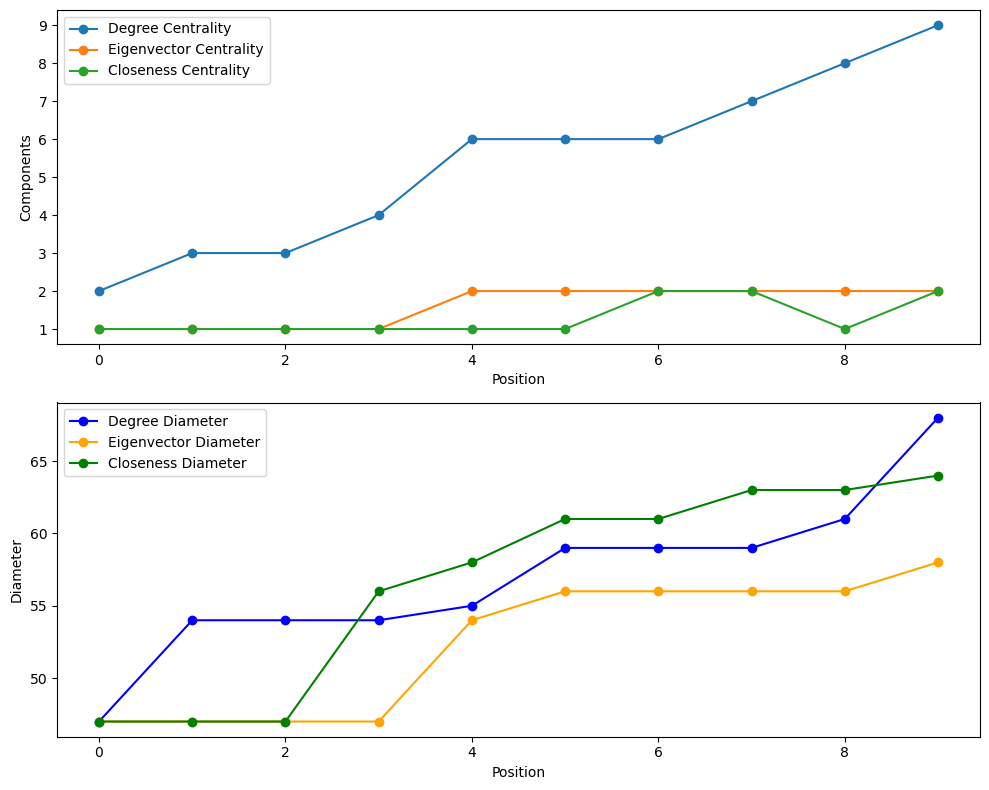

In [9]:
import matplotlib.pyplot as plt

# Define the lists
degree = results_degree
eigenvector = results_eigenvector
closeness = results_closeness

# Extract data for the plot
x = list(range(len(degree)))  # Abscissa
degree_y = [d[1] for d in degree]  # Degree values
eigenvector_y = [e[1] for e in eigenvector]  # Eigenvector values
closeness_y = [c[1] for c in closeness]  # Closeness values
degree_diameter_y = [d[3] for d in degree]  # Diameter values
eigenvector_diameter_y = [e[3] for e in eigenvector]  # Eigenvector values
closeness_diameter_y = [c[3] for c in closeness]  # Closeness values

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot centrality measures
axs[0].plot(x, degree_y, label='Degree Centrality', marker='o')
axs[0].plot(x, eigenvector_y, label='Eigenvector Centrality', marker='o')
axs[0].plot(x, closeness_y, label='Closeness Centrality', marker='o')
axs[0].set_ylabel('Components')
axs[0].set_xlabel('Position')
axs[0].legend()

# Plot diameter
axs[1].plot(x, degree_diameter_y, label='Degree Diameter', color='blue', marker='o')
axs[1].plot(x, eigenvector_diameter_y, label='Eigenvector Diameter', color='orange', marker='o')
axs[1].plot(x, closeness_diameter_y, label='Closeness Diameter', color='green', marker='o')
axs[1].set_ylabel('Diameter')
axs[1].set_xlabel('Position')
axs[1].legend()

plt.savefig('centrality_and_diameter_A.png')

# Show plot
plt.tight_layout()
plt.show()




### Sequential

In [10]:
import networkx as nx

# Load the London Tube network from the GraphML file
underground_network = nx.read_graphml("london_tubenetwork.graphml")

temp1 = underground_network
results_degree = []

for _ in range(10):
    # Calculate degree centrality for the current network
    degree_centrality = nx.degree_centrality(temp1)
    
    # Find the node with the highest degree centrality
    highest_degree_node = max(degree_centrality, key=degree_centrality.get)
    
    # Remove the node with the highest degree centrality
    temp1.remove_node(highest_degree_node)
    
    # Recalculate number of components and diameter
    num_components = nx.number_connected_components(temp1)
    largest_component = max(nx.connected_components(temp1), key=len)
    largest_subgraph = temp1.subgraph(largest_component)
    diameter = nx.diameter(largest_subgraph)
    
    # Store the results
    results_degree.append([highest_degree_node, num_components, [len(comp) for comp in nx.connected_components(temp1)], diameter])

print(results_degree)

underground_network = nx.read_graphml("london_tubenetwork.graphml")
temp2 = underground_network
results_eigenvector = []

for _ in range(10):
    # Calculate degree centrality for the current network
    eigenvector_centrality = nx.eigenvector_centrality(temp2, max_iter=1000)
    
    # Find the node with the highest degree centrality
    highest_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
    
    # Remove the node with the highest degree centrality
    temp2.remove_node(highest_eigenvector_node)
    
    # Recalculate number of components and diameter
    num_components = nx.number_connected_components(temp2)
    largest_component = max(nx.connected_components(temp2), key=len)
    largest_subgraph = temp2.subgraph(largest_component)
    diameter = nx.diameter(largest_subgraph)
    
    # Store the results
    results_eigenvector.append([highest_eigenvector_node, num_components, [len(comp) for comp in nx.connected_components(temp2)], diameter])

print(results_eigenvector)

underground_network = nx.read_graphml("london_tubenetwork.graphml")
temp3 = underground_network
results_closeness = []

for _ in range(10):
    # Calculate degree centrality for the current network
    closeness_centrality = nx.closeness_centrality(temp3)
    
    # Find the node with the highest degree centrality
    highest_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
    
    # Remove the node with the highest degree centrality
    temp3.remove_node(highest_closeness_node)
    
    # Recalculate number of components and diameter
    num_components = nx.number_connected_components(temp3)
    largest_component = max(nx.connected_components(temp3), key=len)
    largest_subgraph = temp3.subgraph(largest_component)
    diameter = nx.diameter(largest_subgraph)
    
    # Store the results
    results_closeness.append([highest_closeness_node, num_components, [len(comp) for comp in nx.connected_components(temp3)], diameter])

print(results_eigenvector)

[['940GZZLUKSX', 2, [420, 17], 47], ['940GZZLUBST', 3, [417, 17, 2], 54], ['940GZZLUGPK', 3, [416, 17, 2], 54], ['940GZZLUECT', 5, [406, 17, 8, 2, 1], 55], ['940GZZLUBNK', 5, [405, 17, 8, 2, 1], 59], ['940GZZLUOXC', 6, [403, 17, 8, 2, 1, 1], 59], ['940GZZLUTNG', 7, [399, 17, 3, 8, 2, 1, 1], 59], ['940GZZLUWHM', 8, [386, 17, 3, 8, 12, 2, 1, 1], 60], ['940GZZDLCGT', 11, [362, 17, 3, 8, 12, 2, 10, 8, 5, 1, 1], 59], ['910GWLSDJHL', 14, [338, 17, 3, 5, 8, 12, 2, 10, 8, 13, 5, 5, 1, 1], 60]]
[['940GZZLUOXC', 1, [437], 47], ['940GZZLUWLO', 1, [436], 47], ['940GZZLUBST', 2, [434, 1], 56], ['940GZZLULVT', 2, [433, 1], 60], ['940GZZLUECT', 4, [423, 8, 1, 1], 60], ['940GZZLUKSX', 6, [403, 17, 8, 2, 1, 1], 61], ['940GZZLUGPK', 6, [402, 17, 8, 2, 1, 1], 61], ['940GZZLUTNG', 7, [398, 17, 3, 8, 2, 1, 1], 61], ['940GZZLUWHM', 8, [385, 17, 3, 8, 12, 2, 1, 1], 67], ['940GZZLULSQ', 8, [384, 17, 3, 8, 12, 2, 1, 1], 72]]
[['940GZZLUOXC', 1, [437], 47], ['940GZZLUWLO', 1, [436], 47], ['940GZZLUBST', 2, [434

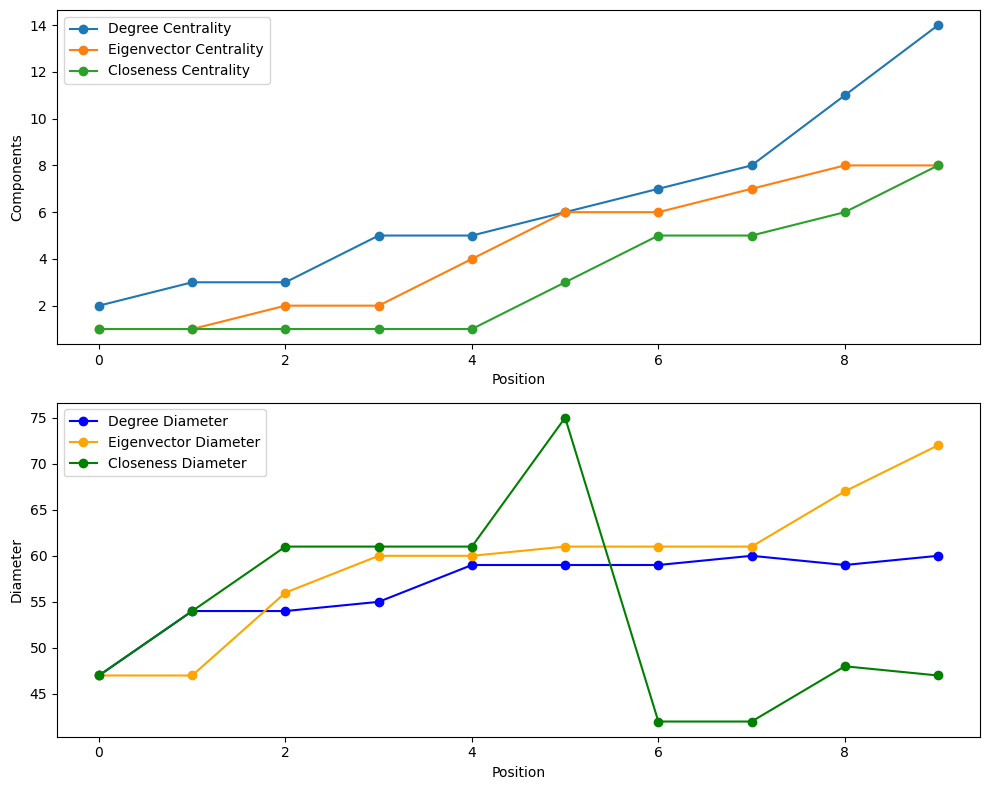

In [11]:
import matplotlib.pyplot as plt

# Define the lists
degree = results_degree
eigenvector = results_eigenvector
closeness = results_closeness

# Extract data for the plot
x = list(range(len(degree)))  # Abscissa
degree_y = [d[1] for d in degree]  # Degree values
eigenvector_y = [e[1] for e in eigenvector]  # Eigenvector values
closeness_y = [c[1] for c in closeness]  # Closeness values
degree_diameter_y = [d[3] for d in degree]  # Diameter values
eigenvector_diameter_y = [e[3] for e in eigenvector]  # Eigenvector values
closeness_diameter_y = [c[3] for c in closeness]  # Closeness values

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot centrality measures
axs[0].plot(x, degree_y, label='Degree Centrality', marker='o')
axs[0].plot(x, eigenvector_y, label='Eigenvector Centrality', marker='o')
axs[0].plot(x, closeness_y, label='Closeness Centrality', marker='o')
axs[0].set_ylabel('Components')
axs[0].set_xlabel('Position')
axs[0].legend()

# Plot diameter
axs[1].plot(x, degree_diameter_y, label='Degree Diameter', color='blue', marker='o')
axs[1].plot(x, eigenvector_diameter_y, label='Eigenvector Diameter', color='orange', marker='o')
axs[1].plot(x, closeness_diameter_y, label='Closeness Diameter', color='green', marker='o')
axs[1].set_ylabel('Diameter')
axs[1].set_xlabel('Position')
axs[1].legend()

plt.savefig('centrality_and_diameter_B.png')

# Show plot
plt.tight_layout()
plt.show()




## Flow

In [1]:
# we will import all the necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

In [2]:
#tlf provides passenger flow data for each network separately
#we need to create a list of all the different files we need
files = ['NBT19MTT2b_od__DLR_tb_wf.csv', 
         'NBT19MTT2b_od__EZL_tb_wf.csv', 
         'NBT19MTT2b_od__LO_tb_wf.csv', 
         'NBT19MTT2b_od__LU_tb_wf.csv']

#create an empty list to store dataframes for each file
dfs = []

#iterate through our files list, read the file and append to our dataframe list
for file in files:
    dfs.append(pd.read_csv('data/' + file))
    
#merge all dataframes
london_OD = pd.concat(dfs, ignore_index=True)

In [3]:
definition_df = pd.read_excel('data/NBT19_Definitions.xlsx', 'Stations')
definition_df.head()
#we will drop any missing values from our dataframe
definition_df.dropna(inplace=True)

#transform mnlc codes from floats to int
definition_df.MNLC = definition_df.MNLC.astype(int)
#pd.options.display.max_rows  = None
definition_df

,MNLC,MASC,StationName,TFL?
0,500,ACTu,Acton Town,True
1,501,BARu,Barbican,True
2,502,ALDu,Aldgate,True
3,503,ALEu,Aldgate East,True
4,504,STId,Stratford International DLR,True
...,...,...,...,...
732,9445,BCJt,Beckenham Junction Trams,True
733,9460,CSTt,Church Street,True
734,9471,ELMt,Elmers End,True
735,9473,GSTt,George Street,True


In [4]:
#add the station names
london_OD['station_origin'] = london_OD['mode_mnlc_o'].apply(lambda x: definition_df[definition_df.MNLC==x]['StationName'].values[0])
london_OD['station_destination'] = london_OD['mode_mnlc_d'].apply(lambda x: definition_df[definition_df.MNLC==x]['StationName'].values[0])
london_OD.head()

,mode_mnlc_o,mode_mnlc_d,2,3,4,5,6,7,mode,1,8,station_origin,station_destination
0,504,523,8.033,16.430,24.563,28.555,13.023,2.263,DLR,NaN,NaN,Stratford International DLR,King George V
1,504,533,30.719,40.105,61.571,57.881,15.573,0.317,DLR,NaN,NaN,Stratford International DLR,London City Airport
2,504,538,5.941,17.238,37.493,43.158,33.890,10.429,DLR,NaN,NaN,Stratford International DLR,Pontoon Dock
3,504,559,5.795,26.397,27.285,24.065,15.213,8.508,DLR,NaN,NaN,Stratford International DLR,West Silvertown
4,504,573,77.786,113.750,143.938,387.562,165.776,65.283,DLR,NaN,NaN,Stratford International DLR,Woolwich Arsenal


In [5]:
# Get the column names as strings
column_names = [str(i) for i in range(1, 9)]

# Replace NaN values with 0 in the specified columns
london_OD.fillna({col: 0 for col in column_names}, inplace=True)

# Sum the specified columns across rows
london_OD['flow'] = london_OD[column_names].sum(axis=1)

# Drop the original eight columns
london_OD.drop(columns=column_names, inplace=True, errors='ignore')

In [6]:
london_OD_sum = london_OD[['station_origin', 'station_destination', 'flow']].copy()
london_OD_sum.flow = london_OD_sum.flow.astype(int)
london_OD_sum.head()

,station_origin,station_destination,flow
0,Stratford International DLR,King George V,92
1,Stratford International DLR,London City Airport,206
2,Stratford International DLR,Pontoon Dock,148
3,Stratford International DLR,West Silvertown,107
4,Stratford International DLR,Woolwich Arsenal,954


In [7]:
# get all the station names
station_origin = list(london_OD_sum.station_origin.values)
station_destination = list(london_OD_sum.station_destination.values)
all_stations = list(set(station_origin + station_destination))
all_stations = sorted(all_stations, key=str.lower)

In [8]:
# match and replace station names
london_OD_sum['station_origin']= london_OD_sum.station_origin.apply(lambda x: 
                                      re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', x)
                                     )
london_OD_sum['station_destination']=london_OD_sum.station_destination.apply(lambda x: 
                                      re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', x)
                                     )


In [9]:
#read in the data using geopandas
stations = gpd.read_file('data/tfl_stations.json')
lines = gpd.read_file('data/tfl_lines.json')

#project data to British National Grid
#we do this so we can work in meters
stations = stations.to_crs(epsg = 27700)
lines = lines.to_crs(epsg = 27700)

#get all station names
station_names = {row.id: row['name'] for i, row in stations.iterrows()}

#clean station names
for k, v in station_names.items():
    if k == 'none':
        continue
    cleaned_name = re.sub('\sLU\s?|\sLO\s?|\sNR\s?|\sTf[lL]\s?|\sDLR\s?|\s\(.*\)', '', v)
    
    #note that bank and monument are enconded as one station in our TFL data, so we will do the same
    if cleaned_name in ['Bank', 'Monument']:
        cleaned_name = 'Bank and Monument'
    station_names[k] = cleaned_name
    
stations['name'] = stations['id'].apply(lambda x: station_names[x])

#get position of stations as mean of x, y of stations
#create empty dict to store list of coordinates
pos = {}

#iterate through the stations
for i, station in stations.iterrows():
    xy = station.geometry.coords[0]
    
    #if station already in dict add coordinate to coordinate list
    if station['name'] in pos.keys():
        pos[station['name']].extend([xy])
    #if station is not in the dict add station to dict and set first coordinate in list
    else:
        pos[station['name']] = [xy]

#iterate through our dict and replace coordinate list with mean value
for k, v in pos.items():
    #we set axis to 0 to make sure to take mean of x and y coordinates
    pos[k] = np.mean(v, axis=0)

#set new geometry
stations['geometry'] = stations['name'].apply(lambda x: Point(pos[x]))

In [10]:
#get all line types as a list and subset geoms by lines
line_names  = lines.lines.apply(lambda x: [x['name'] for x in json.loads(x)] )
line_names = list(set([item for sublist in line_names for item in sublist]))

In [11]:
# check the data for each line
for line in line_names:
    #I'm removing thameslink 6tph line because there are not corresponding stations in station file
    if line == 'Thameslink 6tph line':
        continue
    temp_lines = lines[lines.lines.str.contains(line)]
    temp_stations = stations[stations.lines.str.contains(line)]

In [12]:
#We can see that east london line is incomplete
#digging into this however we notice that it's because east london is actually part of the overground
#merge East London line and London Overground since they are one line
lines.lines = lines.lines.str.replace('East London', 'London Overground')
stations.lines = stations.lines.str.replace('East London', 'London Overground')

#Our TFL data doesn't include tramlink, emirates air lines, and crossrail is still in construction (except not really)
#exclude the lines that we are not going to use
excluded_lines = ['Thameslink 6tph line', 'East London', 'Crossrail 2', 'Emirates Air Line', 'Crossrail', 'Tramlink']

#create an empty dict to hold our geometric graphs
geometric_graphs = {}

#iterate through each line individually
for line_name in line_names:
    #skip lines that we won't be using
    if line_name in excluded_lines :
        continue
    print(line_name)
    
    #subset our line and station files for the ones the belong to a specific line
    temp_lines = lines[lines.lines.str.contains(line_name)]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #create empty graph
    G= nx.Graph()
    
    #iterate through our line geometries
    for i, line in temp_lines.iterrows():
        #get list of coordinates that define our line
        _l = list(line.geometry.coords)

        #add coordinates as edges
        G.add_edges_from(list(zip(_l,_l[1:])))
    
    #remove any self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    #the position of the node is the name of the node
    #let's extract this to plot our graph
    pos = {n: n for n in G.nodes()}
    
    # get degree one nodes
    D = nx.degree(G)
    k1 = [node for node,degree in D if degree==1]
    
    #get distance between all points of 1-degree, this will be a matrix
    dist = distance.cdist(k1, k1)
    
    #add edges between points that are close
    for j in range(dist.shape[0]-1):
        temp = dist[j][j+1:]
        #get index of closest node
        i_min = np.argmin(temp)
        if dist[j][i_min+j+1]<50:
            G.add_edge(k1[j],k1[i_min+j+1])
    
    #recalculate degree
    D = nx.degree(G)
    k1 = [node for node,degree in D if degree==1]
    #store graph in dictionary
    geometric_graphs[line_name] = G


Victoria
District
London Overground
Hammersmith & City
Jubilee
Bakerloo
Central
Northern
TfL Rail
Piccadilly
Circle
Metropolitan
DLR
Waterloo & City


In [13]:
#create a dataframe with all geometries from all valid lines
#this list will contain a dictionary for each edge in our graph that contains
# node pairs, line name, and a geometry (this is just for quick visualization purposes and will be replaced by true geometry)
edge_list = []
def _has_ids(k):
    #helper function to check if line contains id of start and end station
    if ('start_sid' in k.keys()) and ('end_sid' in k.keys()):
        return True
    else:
        return False

#iterate through each line seperately 
for line_name in line_names:
    if line_name in excluded_lines :
        continue
        
    #subset lines and stations
    temp_lines = lines[lines.lines.str.contains(line_name)]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #for each line in our subset dataframe get each origin and destination pair
    for i, line in temp_lines.iterrows():
        for k in json.loads(line.lines):
            if k['name'] == line_name:
                if _has_ids(k):
                    #get start and end station ids
                    start_id = k['start_sid']
                    end_id = k['end_sid']

                    #get info of start and end station
                    start_station = temp_stations[(temp_stations.id == start_id) | (temp_stations.altmodeid == start_id)].values
                    end_station = temp_stations[(temp_stations.id == end_id) | (temp_stations.altmodeid == end_id)].values
                    
                    #if no matching station exist, let's just take the starting and ending coordinate of the line for now
                    if len(start_station) >= 1 and len(end_station) >=1:
                        s_geom = start_station[0][-1].coords[0]
                        e_geom = end_station[0][-1].coords[0]
                        edge_list.append({
                            'line_name': line_name,
                            'start_id': start_id,
                            'end_id': end_id,
                            'geometry': LineString([s_geom, e_geom])
                        })

In [14]:
#turn our dictionary list into a geopandas df to quickly plot and sanity check our work
edge_gdf = gpd.GeoDataFrame(edge_list)
edge_gdf.crs = lines.crs
edge_gdf.head()

,line_name,start_id,end_id,geometry
0,Victoria,940GZZLUBXN,940GZZLUSKW,"LINESTRING (531054.149 175421.931, 530496.858 ..."
1,Victoria,940GZZLUSKW,940GZZLUVXL,"LINESTRING (530496.858 176472.930, 530420.272 ..."
2,Victoria,940GZZLUVXL,940GZZLUPCO,"LINESTRING (530420.272 177894.386, 529723.571 ..."
3,Victoria,940GZZLUPCO,940GZZLUVIC,"LINESTRING (529723.571 178312.661, 528989.161 ..."
4,Victoria,940GZZLUVIC,940GZZLUGPK,"LINESTRING (528989.161 179124.963, 528968.086 ..."


In [15]:
### Add geometry information back into the graph
for line_name in line_names:
    if line_name in excluded_lines :
        continue
    temp_lines = edge_gdf[edge_gdf.line_name == line_name]
    temp_stations = stations[stations.lines.str.contains(line_name)]
    
    #add real geometry back
    for i, edge in temp_lines.iterrows():
        #get start and end of line coordinates
        start = edge.geometry.coords[0]
        end = edge.geometry.coords[-1]
        
        #let's get all the coordinates in our geometric graph
        nodes = list(geometric_graphs[line_name].nodes)
        
        #find nearest node in graph to origin and destination
        s_dist = distance.cdist([start], nodes)[0]
        s_i = np.argmin(s_dist)
        source= nodes[s_i]
        
        t_dist = distance.cdist([end], nodes)[0]
        t_i = np.argmin(t_dist)
        target= nodes[t_i]
        
        #get shortest path
        sp = nx.shortest_path(geometric_graphs[line_name], source, target)
        
        #make into geometry
        #notice how I'm also adding the start and end coordinates to the line definition
        #this fixes the problem of stations and lines not matching up
        geometry = LineString([start] + sp + [end])
        edge_gdf.loc[i, 'geometry'] = geometry

In [16]:
#let's store the length of the real geometry
edge_gdf['length'] = edge_gdf.geometry.length
edge_gdf.head()

,line_name,start_id,end_id,geometry,length
0,Victoria,940GZZLUBXN,940GZZLUSKW,"LINESTRING (531054.149 175421.931, 531052.790 ...",1586.737541
1,Victoria,940GZZLUSKW,940GZZLUVXL,"LINESTRING (530496.858 176472.930, 530495.739 ...",1506.855710
2,Victoria,940GZZLUVXL,940GZZLUPCO,"LINESTRING (530420.272 177894.386, 530419.018 ...",825.328253
3,Victoria,940GZZLUPCO,940GZZLUVIC,"LINESTRING (529723.571 178312.661, 529722.191 ...",1399.878151
4,Victoria,940GZZLUVIC,940GZZLUGPK,"LINESTRING (528989.161 179124.963, 528989.848 ...",1209.599809


In [17]:
#let's replace the ids with the actual name
#get all station names
station_names_2 = {row.altmodeid: row['name'] for i, row in stations.iterrows() if row.altmodeid != None}
station_names.update(station_names_2)
edge_gdf['start_id'] = edge_gdf['start_id'].apply(lambda x: station_names[x])
edge_gdf['end_id'] = edge_gdf['end_id'].apply(lambda x: station_names[x])
edge_gdf.head()

,line_name,start_id,end_id,geometry,length
0,Victoria,Brixton,Stockwell,"LINESTRING (531054.149 175421.931, 531052.790 ...",1586.737541
1,Victoria,Stockwell,Vauxhall,"LINESTRING (530496.858 176472.930, 530495.739 ...",1506.855710
2,Victoria,Vauxhall,Pimlico,"LINESTRING (530420.272 177894.386, 530419.018 ...",825.328253
3,Victoria,Pimlico,Victoria,"LINESTRING (529723.571 178312.661, 529722.191 ...",1399.878151
4,Victoria,Victoria,Green Park,"LINESTRING (528989.161 179124.963, 528989.848 ...",1209.599809


{'TfL Rail', 'Jubilee', 'Bakerloo', 'Victoria', 'District', 'DLR', 'Central', 'Piccadilly', 'Waterloo & City', 'Northern', 'Circle', 'London Overground', 'Metropolitan', 'Hammersmith & City'}


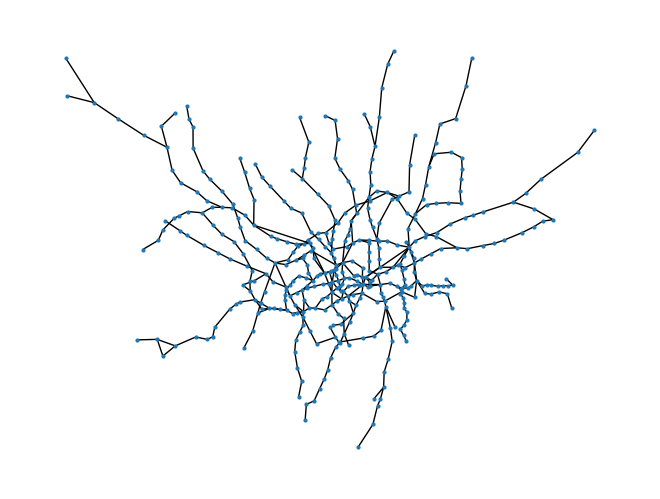

In [18]:
#now we can use this to create our network!
G = nx.from_pandas_edgelist(edge_gdf, source = 'start_id', target='end_id', edge_attr=['length', 'line_name'])

pos = {row['name']: row.geometry.coords[0] for i, row in stations.iterrows() if row['name'] in G.nodes()}
Gcc = nx.connected_components(G)
for n in Gcc:
    G_sub = G.subgraph(n)
    lines = [data['line_name'] for u,v, data in G_sub.edges(data=True)]
    print(set(lines))
    nx.draw(G_sub, pos, node_size=4)
    plt.savefig('network_built.png')
    plt.show()

#save position to graph
nx.set_node_attributes(G, pos, 'coords')

In [19]:
# Sanity check our network
#check that all distances are greater or equal to euclidean distance
for u,v, data in G.edges(data=True):
    assert(data['length'] >= distance.euclidean(pos[u], pos[v]))


In [20]:
#check that our OD data and network data match
OD_names = set(london_OD_sum.station_origin.unique())
network_names = set([n for n in G.nodes()])

In [21]:
network_names.symmetric_difference(OD_names)

{'Acton Main Line',
 'Battersea Power Station',
 'Hanwell',
 'Hayes & Harlington',
 'Heathrow Terminal 4 EL',
 'Heathrow Terminals 123',
 'Heathrow Terminals 2 & 3',
 'Heathrow Terminals 2 & 3 EL',
 'Nine Elms',
 'Southall',
 "Walthamstow Queen's Road",
 'Walthamstow Queens Road',
 'West Ealing'}

In [22]:
name_map = {
    'Heathrow Terminal 4 EL': 'Heathrow Terminal 4',
    'Heathrow Terminals 123': 'Heathrow Terminals 2 & 3',
    'Heathrow Terminals 2 & 3 EL': 'Heathrow Terminals 2 & 3',
    "Walthamstow Queen's Road": 'Walthamstow Queens Road'
}

london_OD_sum.station_origin = london_OD_sum.station_origin.apply(
    lambda x: name_map[x] if x in name_map.keys() else x
)
london_OD_sum.station_destination = london_OD_sum.station_destination.apply(
    lambda x: name_map[x] if x in name_map.keys() else x
)

#let's filter out the stations that we don't have in our network
OD_names = set(london_OD_sum.station_origin.unique())
_filter = list(network_names.symmetric_difference(OD_names))

london_OD_sum = london_OD_sum[~london_OD_sum.station_origin.isin(_filter)]
london_OD_sum = london_OD_sum[~london_OD_sum.station_destination.isin(_filter)]

In [23]:
# Add flow data to our network
#create a dictionary to store flows for all edges
flows = {(u,v): 0 for u,v in G.edges()}

#calculate shortest paths for all flows and add data to dict
for i, row in london_OD_sum.iterrows():
    source = row.station_origin
    target = row.station_destination
    
    #get shortest path
    path = nx.dijkstra_path(G, source, target)
    
    #our path is a list of nodes, we need to turn this to a list of edges
    path_edges = list(zip(path,path[1:])) 
    
    #add flows to our dict
    for u,v in path_edges:
        try:
            flows[(u,v)] += row.flow
        except:
            flows[(v,u)] += row.flow

#set this as a network attribute
nx.set_edge_attributes(G, flows, 'flows')

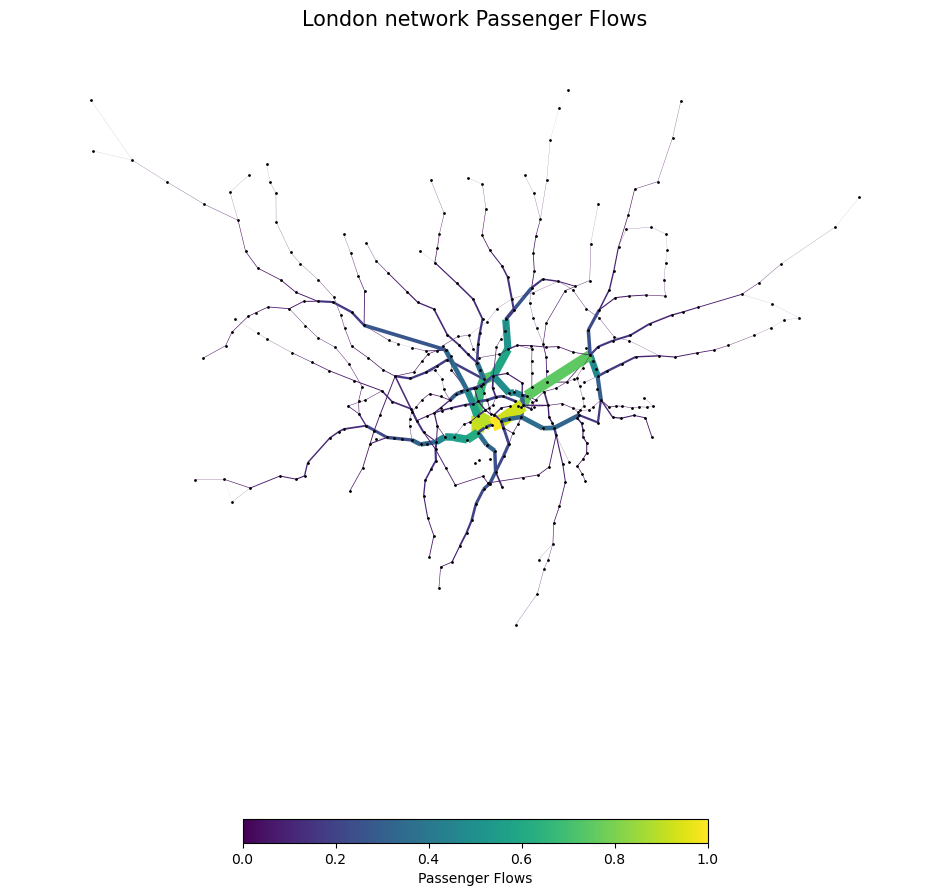

In [24]:
#plot our calcuated flows
flows_values = flows.values()
flow_color=[(i[2]['flows']/max(flows_values)) for i in G.edges(data=True)]
flow_width=[(i[2]['flows']/max(flows_values)*10) for i in G.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=flow_color, width=flow_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Passenger Flows",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London network Passenger Flows",fontsize=15)
plt.savefig('network_built.png')
plt.show()

In [25]:
df = nx.to_pandas_edgelist(G)
df[0:100]

,source,target,length,flows,line_name
0,Liverpool Street,Stratford,6698.461270,656195,TfL Rail
1,Liverpool Street,Aldgate,722.084082,21772,Metropolitan
2,Liverpool Street,Moorgate,434.087449,200131,Metropolitan
3,Liverpool Street,Aldgate East,965.865967,48623,Hammersmith & City
4,Liverpool Street,Bank and Monument,841.502684,603893,Central
...,...,...,...,...,...
95,Highgate,Archway,1590.204796,102589,Northern
96,Archway,Tufnell Park,993.536112,124267,Northern
97,Tufnell Park,Kentish Town,764.601008,134700,Northern
98,Warren Street,Goodge Street,532.573009,53535,Northern


In [25]:
temp_without = G

eigenvector_centrality = nx.eigenvector_centrality(temp_without, max_iter=10000)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

sorted_eigenvector = sorted(sorted_eigenvector, key=lambda x: x[1], reverse=True)[:10]
print(sorted_eigenvector)

[('Bank and Monument', 0.38342708036295764), ('Liverpool Street', 0.32882448287857585), ('Stratford', 0.26917936110280577), ('Waterloo', 0.24973076262544167), ('Moorgate', 0.21513704611676418), ('Green Park', 0.19763015315152296), ('Oxford Circus', 0.18409358428539102), ('Tower Hill', 0.171675870819486), ('Westminster', 0.1686101752603414), ('Shadwell', 0.15908998149833434)]


In [25]:
temp_with = G

eigenvector_centrality = nx.eigenvector_centrality(temp_with, max_iter=10000, weight = 'flows')
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

sorted_eigenvector = sorted(sorted_eigenvector, key=lambda x: x[1], reverse=True)[:10]
print(sorted_eigenvector)

[('Waterloo', 0.487602939923429), ('Westminster', 0.4534754509884076), ('Bank and Monument', 0.39909559265532624), ('Green Park', 0.38033367849194544), ('Liverpool Street', 0.24313693677485357), ('Victoria', 0.1963730178668729), ('Oxford Circus', 0.1814384182425147), ('Bond Street', 0.15565051580652053), ("St. James's Park", 0.13465473498481476), ('Stratford', 0.12249879879198151)]


In [27]:
# non-sequential
temp_non_with = G
eigenvector_centrality = nx.eigenvector_centrality(temp_non_with, max_iter=10000, weight = 'flows')
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

sorted2 = [e for e,v in sorted_eigenvector[:10]]
results_eigenvector_non_with = []
for i in range(3):
    initial_total_flow = sum(attrs['flows'] for u, v, attrs in temp_non_with.edges(data=True))
    temp_non_with.remove_nodes_from(sorted2[:i+1])
    Subg = [temp_non_with.subgraph(c).copy() for c in nx.connected_components(temp_non_with)]

    components = nx.connected_components(temp_non_with)
    largest_component = max(components, key=len)
    Largest_subgraph = temp_non_with.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph)
    component_sizes = [len(subgraph.nodes) for subgraph in Subg]
    total_flow_after_removal = sum(attrs['flows'] for u, v, attrs in temp_non_with.edges(data=True))
    change_in_flow = initial_total_flow - total_flow_after_removal

    results_eigenvector_non_with.append([sorted2[i], diameter, change_in_flow])

print(results_eigenvector_non_with)



[['Waterloo', 38, 2169469], ['Bank and Monument', 38, 1456191], ['Westminster', 38, 106718]]


In [25]:
temp1 = G
results_eigenvector_weighted = []

for _ in range(3):

    initial_total_flow = sum(attrs['flows'] for u, v, attrs in temp1.edges(data=True))
    # Calculate eigenvector centrality for the current network
    eigenvector_centrality = nx.eigenvector_centrality(temp1, max_iter = 1000000, weight = 'flows')
    
    # Find the node with the highest degree centrality
    highest_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
    
    # Remove the node with the highest degree centrality
    temp1.remove_node(highest_eigenvector_node)
    
    # Recalculate number of components and diameter
    largest_component = max(nx.connected_components(temp1), key=len)
    largest_subgraph = temp1.subgraph(largest_component)
    diameter = nx.diameter(largest_subgraph)
    total_flow_after_removal = sum(attrs['flows'] for u, v, attrs in temp1.edges(data=True))
    change_in_flow = initial_total_flow - total_flow_after_removal

    # Store the results
    results_eigenvector_weighted.append([highest_eigenvector_node, diameter, change_in_flow])

print(results_eigenvector_weighted)


[['Green Park', 36, 2628049], ['Waterloo', 38, 2114375], ["King's Cross St. Pancras", 40, 1828973]]
